# Preprocessing of the training dataset

First, all the required libraries are added, then, path and categories have been added.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = '/Users/vishvmac/Machine Learning/Machine learning projects/Intel image classification dataset/intel-image-classification/seg_train/seg_train'
CATEGORIES = ['buildings','forest','glacier','mountain','sea','street']



Now, the path and categories has been combined to define the path to buildings, forest, glacier, mountain, sea, street. The image array has been made by cv2 library. By adding "cv2.IMREAD_GRAYSCALE", the images can be converted to the greyscale and dimensions can be reduced.   
Then, matplotlib.pyplot is used to check the image by plotting. 

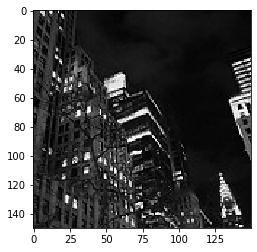

In [32]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to buildings, forest, glacier, mountain, sea, street dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #making array of images with cv2
        plt.imshow(img_array, cmap = 'gray') #plotting image with matplotlib.pyplot
        plt.show()
        break
    break

In [33]:
print(img_array.shape) #printing shape of image array. without grey scale images It will be (150,150,3)

(150, 150)


Below code was written to resize the images with different sizes. In this dataset all the images are already of same sizes (150, 150). But for the dataset of different sizes this code is a must.

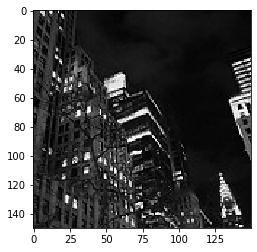

In [34]:
IMG_SIZE =150     

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) #resizing the array with cv2
plt.imshow(new_array, cmap = 'gray')  #plotting image with matplotlib.pyplot
plt.show()

Now, another directory for trainig dat is created. Then, defining of path and reading of images has been done as above. After that, index of labels has been made and labels have been added to the images in training dataset directory.

In [35]:
training_data =[]                       #Creating training dataset directory to add labels to images
def create_training_data():             #Defining traning data directory
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)     #path to buildings, forest, glacier, mountain, sea, street dir
        class_num = CATEGORIES.index(category)     #making index of labels for images
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE )   #reading the images in cv2
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                    #resizing images
                training_data.append([new_array, class_num])    #Adding labels to the images in final training data
            except Exception as e:
                pass
            
            
create_training_data()

All the image data was sorted by its classification before. So, when the neural network will be trained by it it will be fed by all images of one category and then all the images of other category, which is not good for the training of neural network. So, now, with the help of "random.shuffle", all the data will be distributed randomly.

In [36]:
import random                        #importing random class
random.shuffle(training_data)       # Shuffling the training data 

for sample in training_data[:10]:    #printing the sample to check whether the shuffling is been done or not.
    print(sample[1])

5
1
1
5
4
3
3
3
4
4


Creating class for features as X and labels as y. And then deviding the training dataset into features and classification as X and y.

In [37]:
X = []
y = []

In [38]:
for features, label in training_data:  #deviding training dataset in features and labels as X and y.
    X.append(features)
    y.append(label)
    
X= np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE, 1) #reshaping X

Now, here pickle is been used to store the preprocessed data in terms of features and labels so that, it will be handy to train any machine learning model.

In [39]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Below is the procedure for loading the stored X and y data.

In [40]:
pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y= pickle.load(pickle_in)
